## pystack

In [1]:
from pystacknet.pystacknet import StackNetClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor, GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.decomposition import PCA
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
models=[
        [
         LGBMClassifier(boosting_type='gbdt', num_leaves=80, max_depth=-1, learning_rate=0.01, n_estimators=1000, subsample_for_bin=1000, objective="xentropy", min_split_gain=0.0,\
                        min_child_weight=0.01, min_child_samples=10, subsample=0.9, subsample_freq=1, colsample_bytree=0.7, reg_alpha=0.1, reg_lambda=0.1, random_state=1, n_jobs=3),
         LogisticRegression(C=1,  random_state=1),
         RandomForestClassifier(n_estimators=300, criterion="entropy", max_depth=7, max_features=0.7, random_state=1),
         RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=8, max_features=0.7, random_state=1),
         
         LGBMClassifier(boosting_type='gbdt', num_leaves=40, max_depth=10, learning_rate=0.1, n_estimators=1000, subsample_for_bin=1000, objective="xentropy", min_split_gain=0.0,\
                        min_child_weight=0.01, min_child_samples=10, subsample=0.9, subsample_freq=1, colsample_bytree=0.9, reg_alpha=0.2, reg_lambda=0.2, random_state=1, n_jobs=3),
         LogisticRegression(penalty="l1", C=1, random_state=1),
            
         XGBClassifier(max_depth=8,learning_rate=0.1, n_estimators=300, objective="binary:logistic", n_jobs=3, booster="gbtree", random_state=1, colsample_bytree=0.5),
         XGBClassifier(max_depth=10,learning_rate=0.1, n_estimators=300, objective="rank:pairwise", n_jobs=3, booster="gbtree", random_state=1, colsample_bytree=0.7),
         
         LGBMClassifier(boosting_type='gbdt', num_leaves=40, max_depth=-1, learning_rate=0.01, n_estimators=1000, subsample_for_bin=1000, objective="xentropy", min_split_gain=0.0,\
                        min_child_weight=0.01, min_child_samples=10, subsample=0.9, subsample_freq=1, colsample_bytree=0.5, reg_alpha=0.0, reg_lambda=0.0, random_state=1, n_jobs=3)             
         ],
    
        [
        XGBClassifier(max_depth=10,learning_rate=0.1, n_estimators=300, objective="rank:pairwise", n_jobs=3, booster="gbtree", random_state=1, colsample_bytree=0.7),
        LGBMClassifier(boosting_type='gbdt', num_leaves=40, max_depth=-1, learning_rate=0.01, n_estimators=1000, subsample_for_bin=1000, objective="xentropy", min_split_gain=0.0,\
                        min_child_weight=0.01, min_child_samples=10, subsample=0.9, subsample_freq=1, colsample_bytree=0.5, reg_alpha=0.0, reg_lambda=0.0, random_state=1, n_jobs=3),
        RandomForestClassifier(n_estimators=300, criterion="entropy", max_depth=8, max_features=0.7, random_state=1)
        ]
        ]

In [3]:
model=StackNetClassifier(models, metric="f1", folds=3, restacking=True,
                         use_retraining=True, use_proba=False, random_state=12345,
                         n_jobs=4, verbose=2)

In [9]:
model.fit(train_all, target)

====================== Start of Level 0 ======================
Input dinesionality: 102 at Level 0 
9 models included in Level 0 
Level 0, fold 1/3 , model 0 , f1===0.493827 
Level 0, fold 1/3 , model 1 , f1===0.376984 
Level 0, fold 1/3 , model 2 , f1===0.373967 
Level 0, fold 1/3 , model 3 , f1===0.412091 
Level 0, fold 1/3 , model 4 , f1===0.492551 
Level 0, fold 1/3 , model 5 , f1===0.420200 
Level 0, fold 1/3 , model 6 , f1===0.487144 
Level 0, fold 1/3 , model 7 , f1===0.487788 
Level 0, fold 1/3 , model 8 , f1===0.490961 
=========== end of fold  1n level 0 ===========
Level 0, fold 2/3 , model 0 , f1===0.508708 
Level 0, fold 2/3 , model 1 , f1===0.411153 
Level 0, fold 2/3 , model 2 , f1===0.407719 
Level 0, fold 2/3 , model 3 , f1===0.422081 
Level 0, fold 2/3 , model 4 , f1===0.505396 
Level 0, fold 2/3 , model 5 , f1===0.443431 
Level 0, fold 2/3 , model 6 , f1===0.506145 
Level 0, fold 2/3 , model 7 , f1===0.495443 
Level 0, fold 2/3 , model 8 , f1===0.511244 
=========== 

In [10]:
model

StackNetClassifier(folds=3, metric=<function f1 at 0x00000243EC089B70>,
          models=[[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
        learning_rate=0.01, max_depth=-1, min_child_samples=10,
        min_child_weight=0.01, min_split_gain=0.0, n_estimators=1000,
        n_jobs=3, num_leaves=80, objective='xentropy', random_state=1,
        ...stimators=300, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)]],
          n_jobs=4, random_state=12345, restacking=True, use_proba=False,
          use_retraining=True, verbose=2)

In [12]:
preds=model.predict_proba(test_all)

====================== Start of Level 0 ======================
1 estimators included in Level 0 
====================== Start of Level 1 ======================
1 estimators included in Level 1 


In [18]:
sub = np.where(preds[:,2]>=0.61,1,0)
make_submission(sub).to_csv('py_stacknet.csv', index=False)

In [15]:
np.save('preds_pystacknet.py', preds)

## The Boring Stuff

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import time
import xgboost as xgb
import lightgbm as lgb
# import category_encoders as cat_ed
import gc, mlcrate, glob

# from gplearn.genetic import SymbolicTransformer, SymbolicClassifier
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, ExtraTreesRegressor
from IPython.display import display

from catboost import CatBoostClassifier
from scipy.cluster import hierarchy as hc
from collections import Counter

from sklearn import metrics
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  roc_auc_score, log_loss
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, FactorAnalysis
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# will ignore all warning from sklearn, seaborn etc..
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

pd.option_context("display.max_rows", 1000);
pd.option_context("display.max_columns", 1000);

In [3]:
PATH = os.getcwd()
PATH

'D:\\Github\\fastai\\courses\\ml1\\AV_WNS'

In [4]:
df_raw = pd.read_csv(f'{PATH}\\train.csv', low_memory=False)
df_test = pd.read_csv(f'{PATH}\\test.csv', low_memory=False)

In [5]:
df_raw.shape, df_test.shape

((54808, 14), (23490, 13))

In [6]:
new_cols = ['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80_percent', 'awards_won_bool',
       'avg_training_score', 'is_promoted']
#re-naming them
df_raw.columns = new_cols
df_test.columns = new_cols[:-1]

cat_cols = list(df_raw.select_dtypes(include=['object']).columns)
num_cols = list(df_raw.select_dtypes(exclude=['object']).columns)

In [7]:
## Since we can't use id cols, it better dropping them straight front!
drop_col = ['employee_id']
df_raw.drop(drop_col, axis=1, inplace=True)
df_test.drop(drop_col, axis=1, inplace=True)

## 2.

In [8]:
# %%time
#creating interactions all Run At Last and add tf-idf, count vec
# for f in range (0,len(cat_cols)):
#     for s in range (f+1,len(cat_cols)):
#     # Basically this is creating interactions..( 2 - way) 
#         df_raw[cat_cols[f] + "_" + cat_cols[s]] = df_raw[cat_cols[f]] + "_" + df_raw[cat_cols[s]]
#         df_test[cat_cols[f] + "_" + cat_cols[s]] = df_test[cat_cols[f]] + "_" + df_test[cat_cols[s]]            
#         cat_cols.append(cat_cols[f] + "_" + cat_cols[s])
#     print(len(cat_cols), end=' ')

In [9]:
###########################kind of binning age at trivial level #####################################

df_raw['is_age_39'] = np.zeros(df_raw.shape[0])
my_query = df_raw.query('age<=39.').index
df_raw.iloc[my_query, -1] = 1
df_raw['is_age_39_45'] = np.zeros(df_raw.shape[0])
my_query = df_raw.query('age>=39. & age<=45.').index
df_raw.iloc[my_query, -1] = 1
df_raw['is_age_45'] = np.zeros(df_raw.shape[0])
my_query = df_raw.query('age>=45.').index
df_raw.iloc[my_query, -1] = 1

#######################################################################################################
###################young age (13–30), middle age (31–50) and senior age (51–70)########################
#######################################################################################################

df_raw['age_group'] = np.zeros(df_raw.shape[0])
my_query = df_raw.query('age>=20. & age<=30.').index
df_raw.iloc[my_query, -1] = 'young'
my_query = df_raw.query('age>=31. & age<=50.').index
df_raw.iloc[my_query, -1] = 'middle_aged'
my_query = df_raw.query('age>=51. & age<=60.').index
df_raw.iloc[my_query, -1] = 'senior_aged'
###################################################################################################################
###################################################################################################################
###################################################################################################################

###########################kind of binning age at trivial level #####################################

df_test['is_age_39'] = np.zeros(df_test.shape[0])
my_query = df_test.query('age<=39.').index
df_test.iloc[my_query, -1] = 1
df_test['is_age_39_45'] = np.zeros(df_test.shape[0])
my_query = df_test.query('age>=39. & age<=45.').index
df_test.iloc[my_query, -1] = 1
df_test['is_age_45'] = np.zeros(df_test.shape[0])
my_query = df_test.query('age>=45.').index
df_test.iloc[my_query, -1] = 1

#######################################################################################################
###################young age (13–30), middle age (31–50) and senior age (51–70)########################
#######################################################################################################

df_test['age_group'] = np.zeros(df_test.shape[0])
my_query = df_test.query('age>=20. & age<=30.').index
df_test.iloc[my_query, -1] = 'young'
my_query = df_test.query('age>=31. & age<=50.').index
df_test.iloc[my_query, -1] = 'middle_aged'
my_query = df_test.query('age>=51. & age<=60.').index
df_test.iloc[my_query, -1] = 'senior_aged';
###############################################################################

In [10]:
df_raw['promotion_chance'] = 'low'
my_query = df_raw.query('avg_training_score>=90').index
df_raw.iloc[my_query, -1] = 'very_high'
my_query = df_raw.query('avg_training_score>=75 and avg_training_score<90').index
df_raw.iloc[my_query, -1] = 'high'
my_query = df_raw.query('avg_training_score>=65 and avg_training_score<75').index
df_raw.iloc[my_query, -1] = 'medium'
my_query = df_raw.query('avg_training_score>=53 and avg_training_score<65').index
df_raw.iloc[my_query, -1] = 'low_medium'

df_test['promotion_chance'] = 'low'
my_query = df_test.query('avg_training_score>=90').index
df_test.iloc[my_query, -1] = 'very_high'
my_query = df_test.query('avg_training_score>=75 and avg_training_score<90').index
df_test.iloc[my_query, -1] = 'high'
my_query = df_test.query('avg_training_score>=65 and avg_training_score<75').index
df_test.iloc[my_query, -1] = 'medium'
my_query = df_test.query('avg_training_score>=53 and avg_training_score<65').index
df_test.iloc[my_query, -1] = 'low_medium'

In [10]:
feats_added = []

df_raw['joining_age'] = df_raw['age'] - df_raw['length_of_service']
df_test['joining_age'] = df_test['age'] - df_test['length_of_service']
feats_added.append('joining_age')

df_raw['region'].replace('region_', '', True, None, True)
df_test['region'].replace('region_', '', True, None, True)
################################################################################3
bins = [20., 25., 30., 35., 40., 45., 50., 55., 60., 70]
labels = [i+1 for i in range(len(bins) - 1)]
bin_cols = ['age']
for col in bin_cols:    
    df_raw[f'bin_{col}'.format(col)]  = pd.cut(df_raw[col] ,bins,labels = labels)
    df_test[f'bin_{col}'.format(col)] = pd.cut(df_test[col],bins,labels = labels)
feats_added.append('bin_age')

bins = [39., 44., 54., 66., 75., 80., 85., 90., 95.]
labels = [i+1 for i in range(len(bins) - 1)]
bin_cols = ['avg_training_score']
for col in bin_cols:    
    df_raw[f'bin_{col}'.format(col)]  = pd.cut(df_raw[col] ,bins,labels = labels)
    df_test[f'bin_{col}'.format(col)] = pd.cut(df_test[col],bins,labels = labels)

feats_added.append('bin_avg_training_score')
feats_added.append(['age_group', 'is_age_39', 'is_age_39_45', 'is_age_45', 'promotion_chance',\
                   'reg_count','mean_age_per_region','mean_joining_age_per_region','mean_previous_year_rating_per_region',\
                    'mean_avg_training_score_per_region','mean_length_of_service_per_region'])
################################################################################################
df_raw['promotion_chance'] = 'low'
my_query = df_raw.query('avg_training_score>=90').index
df_raw.iloc[my_query, -1] = 'very_high'
my_query = df_raw.query('avg_training_score>=75 and avg_training_score<90').index
df_raw.iloc[my_query, -1] = 'high'
my_query = df_raw.query('avg_training_score>=65 and avg_training_score<75').index
df_raw.iloc[my_query, -1] = 'medium'
my_query = df_raw.query('avg_training_score>=53 and avg_training_score<65').index
df_raw.iloc[my_query, -1] = 'low_medium'

df_test['promotion_chance'] = 'low'
my_query = df_test.query('avg_training_score>=90').index
df_test.iloc[my_query, -1] = 'very_high'
my_query = df_test.query('avg_training_score>=75 and avg_training_score<90').index
df_test.iloc[my_query, -1] = 'high'
my_query = df_test.query('avg_training_score>=65 and avg_training_score<75').index
df_test.iloc[my_query, -1] = 'medium'
my_query = df_test.query('avg_training_score>=53 and avg_training_score<65').index
df_test.iloc[my_query, -1] = 'low_medium'
###############################################################################################
def map_(regs, age):
    d = {}
    for i,j in zip(regs, age):
        d[i] = j
    return d

xyz = df_raw.groupby('region').mean().sort_values(by='region')[['age', 'joining_age', 'previous_year_rating', 'length_of_service', 'avg_training_score']]
count = Counter(df_raw['region'])

regs                   = xyz.reset_index()['region'].values
age                    = xyz.reset_index()['age'].values
joining_age            = xyz.reset_index()['joining_age'].values
previous_year_rating   = xyz.reset_index()['previous_year_rating'].values
length_of_service      = xyz.reset_index()['length_of_service'].values 
avg_training_score     = xyz.reset_index()['avg_training_score'].values

df_raw['reg_count'] = df_raw['region'].map(count)
d = map_(regs, age)
df_raw['mean_age_per_region']   = df_raw['region'].map(d)
d = map_(regs, joining_age)
df_raw['mean_joining_age_per_region']   = df_raw['region'].map(d)
d = map_(regs, previous_year_rating)
df_raw['mean_previous_year_rating_per_region']   = df_raw['region'].map(d)
d = map_(regs, avg_training_score)
df_raw['mean_avg_training_score_per_region']   = df_raw['region'].map(d)
d = map_(regs, length_of_service)
df_raw['mean_length_of_service_per_region']   = df_raw['region'].map(d)

xyz = df_test.groupby('region').mean().sort_values(by='region')[['age', 'joining_age', 'previous_year_rating', 'length_of_service', 'avg_training_score']]
count = Counter(df_test['region'])

regs                   = xyz.reset_index()['region'].values
age                    = xyz.reset_index()['age'].values
joining_age            = xyz.reset_index()['joining_age'].values
previous_year_rating   = xyz.reset_index()['previous_year_rating'].values
length_of_service      = xyz.reset_index()['length_of_service'].values 
avg_training_score     = xyz.reset_index()['avg_training_score'].values

df_test['reg_count'] = df_test['region'].map(count)
d = map_(regs, age)
df_test['mean_age_per_region']   = df_test['region'].map(d)
d = map_(regs, joining_age)
df_test['mean_joining_age_per_region']   = df_test['region'].map(d)
d = map_(regs, previous_year_rating)
df_test['mean_previous_year_rating_per_region']   = df_test['region'].map(d)
d = map_(regs, avg_training_score)
df_test['mean_avg_training_score_per_region']   = df_test['region'].map(d)
d = map_(regs, length_of_service)
df_test['mean_length_of_service_per_region']   = df_test['region'].map(d)
####################################################################################


del d, count, regs, joining_age, previous_year_rating, length_of_service, avg_training_score
gc.collect()

504

In [11]:
df_raw['promotion_chance'].head()

0           low
1    low_medium
2           low
3           low
4        medium
Name: promotion_chance, dtype: object

In [12]:
#https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [13]:
train_cats(df_raw);
apply_cats(df_test,df_raw)

In [14]:
cat_cols = list(df_raw.select_dtypes(include=['object','category']).columns)

In [15]:
train_encoded, test_encoded = [], []
for i in range(len(cat_cols)):
    trn, sub = target_encode(df_raw[cat_cols[i]], 
                             df_test[cat_cols[i]], 
                             target=df_raw.is_promoted, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    train_encoded.append(trn)
    test_encoded.append(sub)
    print(i, end=',')

0,1,2,3,4,5,6,7,8,

In [16]:
df_raw_cat = df_raw[cat_cols]
df_test_cat = df_test[cat_cols]
df_raw.drop(cat_cols, axis=1, inplace=True)
df_test.drop(cat_cols, axis=1, inplace=True)
df_raw.shape, df_test.shape

((54808, 18), (23490, 17))

In [17]:
df_raw_cat.get_ftype_counts()

category:dense    9
dtype: int64

In [18]:
df_raw.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80_percent,awards_won_bool,avg_training_score,is_promoted,is_age_39,is_age_39_45,is_age_45,joining_age,reg_count,mean_age_per_region,mean_joining_age_per_region,mean_previous_year_rating_per_region,mean_avg_training_score_per_region,mean_length_of_service_per_region
0,1,35,5.0,8,1,0,49,0,1.0,0.0,0.0,27,4843,35.644229,29.417716,3.405671,63.940946,6.226512
1,1,30,5.0,4,0,0,60,0,1.0,0.0,0.0,26,6428,32.321251,27.444462,3.387227,65.699440,4.876789
2,1,34,3.0,7,0,0,50,0,1.0,0.0,0.0,27,874,36.113272,29.662471,3.357311,61.270023,6.450801
3,2,39,1.0,10,0,0,50,0,1.0,1.0,0.0,29,1175,34.531064,28.654468,3.367257,64.330213,5.876596
4,1,45,3.0,2,0,0,73,0,0.0,1.0,1.0,43,2260,33.417257,28.184513,3.292135,65.084071,5.232743


In [16]:
target = df_raw.is_promoted
df_raw.drop('is_promoted', axis=1, inplace=True)

### Catboost

In [23]:
categorical_features_indices1 = np.where(df_raw.dtypes == 'category')[0];
categorical_features_indices1

array([ 0,  1,  2,  3,  4, 15, 16, 18, 19], dtype=int64)

In [32]:
df_raw['previous_year_rating'].fillna(0,inplace=True)
df_test['previous_year_rating'].fillna(0,inplace=True)

In [36]:
df_raw.fillna(method='bfill',inplace=True)
df_test.fillna(method='bfill',inplace=True)

In [37]:
X_train, X_validation, y_train, y_validation = train_test_split(df_raw, target, test_size=0.8, random_state=1234, stratify=target)

In [47]:
#importing library and building model
from catboost import CatBoostClassifier
model=CatBoostClassifier(logging_level='Verbose',class_weights=[0.3,0.7],iterations=500, depth=10, learning_rate=0.01, loss_function='Logloss',\
                         )
model.fit(X_train, y_train,cat_features=categorical_features_indices1,eval_set=(X_validation, y_validation))

0:	learn: 0.6782690	test: 0.6782943	best: 0.6782943 (0)	total: 130ms	remaining: 1m 4s
1:	learn: 0.6644973	test: 0.6645033	best: 0.6645033 (1)	total: 330ms	remaining: 1m 22s
2:	learn: 0.6504474	test: 0.6502320	best: 0.6502320 (2)	total: 589ms	remaining: 1m 37s
3:	learn: 0.6375652	test: 0.6372470	best: 0.6372470 (3)	total: 661ms	remaining: 1m 21s
4:	learn: 0.6271148	test: 0.6268062	best: 0.6268062 (4)	total: 761ms	remaining: 1m 15s
5:	learn: 0.6162614	test: 0.6159389	best: 0.6159389 (5)	total: 981ms	remaining: 1m 20s
6:	learn: 0.6055217	test: 0.6053170	best: 0.6053170 (6)	total: 1.03s	remaining: 1m 12s
7:	learn: 0.5957500	test: 0.5956208	best: 0.5956208 (7)	total: 1.23s	remaining: 1m 15s
8:	learn: 0.5871382	test: 0.5869913	best: 0.5869913 (8)	total: 1.33s	remaining: 1m 12s
9:	learn: 0.5820280	test: 0.5819327	best: 0.5819327 (9)	total: 1.36s	remaining: 1m 6s
10:	learn: 0.5712530	test: 0.5711174	best: 0.5711174 (10)	total: 1.45s	remaining: 1m 4s
11:	learn: 0.5632898	test: 0.5631117	best: 0

94:	learn: 0.3170406	test: 0.3200545	best: 0.3200545 (94)	total: 15.2s	remaining: 1m 4s
95:	learn: 0.3161440	test: 0.3192445	best: 0.3192445 (95)	total: 15.5s	remaining: 1m 5s
96:	learn: 0.3156738	test: 0.3187952	best: 0.3187952 (96)	total: 15.6s	remaining: 1m 4s
97:	learn: 0.3150372	test: 0.3181797	best: 0.3181797 (97)	total: 15.7s	remaining: 1m 4s
98:	learn: 0.3137451	test: 0.3169695	best: 0.3169695 (98)	total: 16s	remaining: 1m 4s
99:	learn: 0.3127035	test: 0.3160290	best: 0.3160290 (99)	total: 16.1s	remaining: 1m 4s
100:	learn: 0.3121719	test: 0.3155270	best: 0.3155270 (100)	total: 16.4s	remaining: 1m 4s
101:	learn: 0.3116192	test: 0.3149907	best: 0.3149907 (101)	total: 16.5s	remaining: 1m 4s
102:	learn: 0.3103718	test: 0.3137401	best: 0.3137401 (102)	total: 16.7s	remaining: 1m 4s
103:	learn: 0.3089855	test: 0.3123467	best: 0.3123467 (103)	total: 17s	remaining: 1m 4s
104:	learn: 0.3084007	test: 0.3118331	best: 0.3118331 (104)	total: 17.2s	remaining: 1m 4s
105:	learn: 0.3073362	test

186:	learn: 0.2711732	test: 0.2812271	best: 0.2812271 (186)	total: 34.8s	remaining: 58.2s
187:	learn: 0.2708098	test: 0.2809988	best: 0.2809988 (187)	total: 35s	remaining: 58s
188:	learn: 0.2703706	test: 0.2806192	best: 0.2806192 (188)	total: 35.2s	remaining: 57.9s
189:	learn: 0.2703106	test: 0.2805603	best: 0.2805603 (189)	total: 35.3s	remaining: 57.5s
190:	learn: 0.2701618	test: 0.2804451	best: 0.2804451 (190)	total: 35.3s	remaining: 57.1s
191:	learn: 0.2698119	test: 0.2801589	best: 0.2801589 (191)	total: 35.5s	remaining: 57s
192:	learn: 0.2695941	test: 0.2800623	best: 0.2800623 (192)	total: 35.8s	remaining: 56.9s
193:	learn: 0.2695261	test: 0.2800076	best: 0.2800076 (193)	total: 35.8s	remaining: 56.5s
194:	learn: 0.2693427	test: 0.2798824	best: 0.2798824 (194)	total: 35.9s	remaining: 56.2s
195:	learn: 0.2691514	test: 0.2797682	best: 0.2797682 (195)	total: 36.1s	remaining: 55.9s
196:	learn: 0.2688871	test: 0.2795863	best: 0.2795863 (196)	total: 36.3s	remaining: 55.8s
197:	learn: 0.26

278:	learn: 0.2561130	test: 0.2718698	best: 0.2718698 (278)	total: 54.1s	remaining: 42.8s
279:	learn: 0.2559764	test: 0.2718405	best: 0.2718405 (279)	total: 54.3s	remaining: 42.7s
280:	learn: 0.2558884	test: 0.2717923	best: 0.2717923 (280)	total: 54.6s	remaining: 42.5s
281:	learn: 0.2557700	test: 0.2716865	best: 0.2716865 (281)	total: 54.7s	remaining: 42.3s
282:	learn: 0.2556615	test: 0.2715942	best: 0.2715942 (282)	total: 54.8s	remaining: 42s
283:	learn: 0.2556263	test: 0.2715792	best: 0.2715792 (283)	total: 54.9s	remaining: 41.7s
284:	learn: 0.2555089	test: 0.2715271	best: 0.2715271 (284)	total: 55.2s	remaining: 41.6s
285:	learn: 0.2554592	test: 0.2715123	best: 0.2715123 (285)	total: 55.3s	remaining: 41.3s
286:	learn: 0.2553529	test: 0.2714606	best: 0.2714606 (286)	total: 55.5s	remaining: 41.2s
287:	learn: 0.2552948	test: 0.2714409	best: 0.2714409 (287)	total: 55.6s	remaining: 40.9s
288:	learn: 0.2551043	test: 0.2713170	best: 0.2713170 (288)	total: 55.9s	remaining: 40.8s
289:	learn: 

370:	learn: 0.2489973	test: 0.2688570	best: 0.2688570 (370)	total: 1m 11s	remaining: 24.7s
371:	learn: 0.2488961	test: 0.2688056	best: 0.2688056 (371)	total: 1m 11s	remaining: 24.6s
372:	learn: 0.2488551	test: 0.2687829	best: 0.2687829 (372)	total: 1m 11s	remaining: 24.3s
373:	learn: 0.2487541	test: 0.2687196	best: 0.2687196 (373)	total: 1m 11s	remaining: 24.2s
374:	learn: 0.2487386	test: 0.2687159	best: 0.2687159 (374)	total: 1m 11s	remaining: 23.9s
375:	learn: 0.2486257	test: 0.2686818	best: 0.2686818 (375)	total: 1m 12s	remaining: 23.8s
376:	learn: 0.2484617	test: 0.2686481	best: 0.2686481 (376)	total: 1m 12s	remaining: 23.6s
377:	learn: 0.2484026	test: 0.2686078	best: 0.2686078 (377)	total: 1m 12s	remaining: 23.4s
378:	learn: 0.2483480	test: 0.2685902	best: 0.2685902 (378)	total: 1m 12s	remaining: 23.2s
379:	learn: 0.2483092	test: 0.2685708	best: 0.2685708 (379)	total: 1m 12s	remaining: 23s
380:	learn: 0.2482213	test: 0.2685176	best: 0.2685176 (380)	total: 1m 13s	remaining: 22.8s
3

461:	learn: 0.2452950	test: 0.2674787	best: 0.2674787 (461)	total: 1m 25s	remaining: 7.04s
462:	learn: 0.2451842	test: 0.2674353	best: 0.2674353 (462)	total: 1m 25s	remaining: 6.86s
463:	learn: 0.2451807	test: 0.2674356	best: 0.2674353 (462)	total: 1m 25s	remaining: 6.66s
464:	learn: 0.2451332	test: 0.2674233	best: 0.2674233 (464)	total: 1m 26s	remaining: 6.48s
465:	learn: 0.2450552	test: 0.2674102	best: 0.2674102 (465)	total: 1m 26s	remaining: 6.3s
466:	learn: 0.2450256	test: 0.2673914	best: 0.2673914 (466)	total: 1m 26s	remaining: 6.13s
467:	learn: 0.2449863	test: 0.2673778	best: 0.2673778 (467)	total: 1m 26s	remaining: 5.95s
468:	learn: 0.2449661	test: 0.2673743	best: 0.2673743 (468)	total: 1m 27s	remaining: 5.75s
469:	learn: 0.2449481	test: 0.2673684	best: 0.2673684 (469)	total: 1m 27s	remaining: 5.56s
470:	learn: 0.2449228	test: 0.2673611	best: 0.2673611 (470)	total: 1m 27s	remaining: 5.37s
471:	learn: 0.2449151	test: 0.2673579	best: 0.2673579 (471)	total: 1m 27s	remaining: 5.18s


In [50]:
model.predict_proba(df_test)

array([[ 0.78023,  0.21977],
       [ 0.99108,  0.00892],
       [ 0.99825,  0.00175],
       ..., 
       [ 0.99566,  0.00434],
       [ 0.98803,  0.01197],
       [ 0.24806,  0.75194]])

In [60]:
temp = pd.DataFrame()
l =[]
for i,j in zip(model.feature_importances_, df_raw.columns):
    l.append([j,i])

<Figure size 720x720 with 0 Axes>

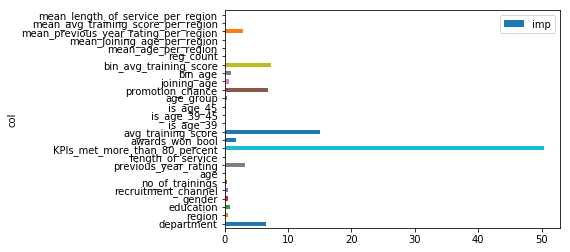

In [73]:
temp = pd.DataFrame(l,columns=['col', 'imp'])
plt.figure(figsize=(10,10))
temp.plot('col','imp',kind='barh')

## xgb

In [19]:
target = df_raw.is_promoted
df_raw.drop('is_promoted', axis=1, inplace=True)
df_raw['previous_year_rating'].fillna(0,inplace=True)
df_test['previous_year_rating'].fillna(0,inplace=True)

In [20]:
#df_raw[pd.isnull(df_raw['previous_year_rating'])]

In [20]:
train_encoded_T, test_encoded_T = np.asarray(train_encoded).T, np.asarray(test_encoded).T

In [21]:
# ###need to check on this
# df_raw_cat['promotion_chance'] = df_raw['promotion_chance']
# df_test_cat['promotion_chance'] = df_test['promotion_chance']
# df_raw.drop('promotion_chance', axis=1,inplace=True)
# df_test.drop('promotion_chance', axis=1,inplace=True)

In [21]:
df_raw_cat.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'age_group', 'bin_age', 'bin_avg_training_score', 'promotion_chance'],
      dtype='object')

In [22]:
train_all, test_all = np.hstack((df_raw, train_encoded_T, pd.get_dummies(df_raw_cat))), np.hstack((df_test, test_encoded_T, pd.get_dummies(df_test_cat)))

In [23]:
train_all.shape, test_all.shape

((54808, 102), (23490, 102))

## Model

In [7]:
def make_submission(probs):
    sample = pd.read_csv(f'{PATH}\\sample_submission.csv')
    submit = sample.copy()
    submit['is_promoted'] = probs
    return submit

In [25]:
np.count_nonzero(target), target.shape[0]- 4668

(4668, 50140)

In [8]:
train_all, test_all, target = np.load('train_all.npy'), np.load('test_all.npy'), np.load('target.npy')

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(train_all, target, test_size = .2, stratify = target)

In [27]:
def runXGB(train_X, train_y, test_X, test_y=None):
        params = {}
        params['booster'] = 'gbtree'
        params['tree_method'] = 'gpu_hist'
        params["objective"] = "binary:logistic"
        params['eval_metric'] = 'auc'
        params["eta"] = 0.05 #0.03
        params["subsample"] = .8
        params["silent"] = 0
        params['verbose'] = 1
        params["max_depth"] = 10
        params["seed"] = 1
        params["max_delta_step"] = 4
        params['scale_pos_weight'] =  50140/4668
        params["gamma"] = 0.6 #.5 #.1 #.2
        params['colsample_bytree'] = 0.75
        params['nrounds'] = 1000 #3600 #2000 #4000
        plst = list(params.items())

        xgtrain = xgb.DMatrix(train_X, label=train_y)
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain)
        pred_test_y = model.predict(xgtest)
        return pred_test_y

In [29]:
val_preds = runXGB(X_train, y_train, X_valid,)

In [30]:
val_preds, max(val_preds)

(array([ 0.34756,  0.35743,  0.49354, ...,  0.36264,  0.58743,  0.46702], dtype=float32),
 0.70014787)

In [10]:
# test_preds = model_srk.predict(test_all)

## hit try error optimisation

In [31]:
params = {}
params['booster'] = 'gbtree'
params['tree_method'] = 'gpu_hist'
params["objective"] = "binary:logistic"
params['eval_metric'] = 'auc'
params["eta"] = 0.05 #0.03
params["subsample"] = .85
params["silent"] = 0
params['verbose'] = 1
params["max_depth"] = 10
params["seed"] = 1
params["max_delta_step"] = 4
params['scale_pos_weight'] =  50140/4668
params["gamma"] = 0.6 #.5 #.1 #.2
params['colsample_bytree'] = 0.75
params['nrounds'] = 500 #3600 #2000 #4000

In [23]:
# X_train, X_valid, y_train, y_valid = train_test_split(train_all, target, test_size = .2, stratify = target)

In [33]:
model, p_train, p_test = mlcrate.xgb.train_kfold(params, train_all, target, test_all, folds = 7, stratify=target)

[mlcrate] Training 7 stratified XGBoost models on training set (54808, 102) with test set (23490, 102)
[mlcrate] Running fold 0, 46978 train samples, 7830 validation samples
[0]	train-auc:0.895494	valid-auc:0.864586
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[1]	train-auc:0.919072	valid-auc:0.885218
[2]	train-auc:0.92753	valid-auc:0.891484
[3]	train-auc:0.933167	valid-auc:0.893178
[4]	train-auc:0.939409	valid-auc:0.896358
[5]	train-auc:0.943433	valid-auc:0.896474
[6]	train-auc:0.945777	valid-auc:0.898182
[7]	train-auc:0.948576	valid-auc:0.89888
[8]	train-auc:0.949797	valid-auc:0.89965
[9]	train-auc:0.95137	valid-auc:0.899572
[10]	train-auc:0.95256	valid-auc:0.899886
[11]	train-auc:0.953416	valid-auc:0.899446
[12]	train-auc:0.954083	valid-auc:0.9001
[13]	train-auc:0.955036	valid-auc:0.900557
[14]	train-auc:0.955806	valid-auc:0.901206
[15]	train-auc:0.957452	valid-auc:0.900595
[16]	train-a

C:\ProgramData\Anaconda3\lib\site-packages\mlcrate\backend.py:7: UserWarning: Timer.format_elapsed() has been deprecated in favour of Timer.fsince() and will be removed soon
  warn(message)


[mlcrate] Finished training fold 0 - took 19s - running score 0.905722
[mlcrate] Running fold 1, 46978 train samples, 7830 validation samples
[0]	train-auc:0.901836	valid-auc:0.856622
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[1]	train-auc:0.92376	valid-auc:0.879527
[2]	train-auc:0.932131	valid-auc:0.887195
[3]	train-auc:0.936522	valid-auc:0.888585
[4]	train-auc:0.943282	valid-auc:0.888041
[5]	train-auc:0.947342	valid-auc:0.888624
[6]	train-auc:0.948614	valid-auc:0.891658
[7]	train-auc:0.951232	valid-auc:0.89332
[8]	train-auc:0.952888	valid-auc:0.892759
[9]	train-auc:0.954148	valid-auc:0.893651
[10]	train-auc:0.955218	valid-auc:0.893219
[11]	train-auc:0.956239	valid-auc:0.894971
[12]	train-auc:0.957062	valid-auc:0.895332
[13]	train-auc:0.957206	valid-auc:0.895961
[14]	train-auc:0.958271	valid-auc:0.896596
[15]	train-auc:0.959368	valid-auc:0.896157
[16]	train-auc:0.960386	valid-auc:0.896

C:\ProgramData\Anaconda3\lib\site-packages\mlcrate\backend.py:7: UserWarning: Timer.format_elapsed() has been deprecated in favour of Timer.fsince() and will be removed soon
  warn(message)


[mlcrate] Finished training fold 1 - took 25s - running score 0.9035930000000001
[mlcrate] Running fold 2, 46978 train samples, 7830 validation samples
[0]	train-auc:0.895298	valid-auc:0.851797
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[1]	train-auc:0.918093	valid-auc:0.879972
[2]	train-auc:0.926517	valid-auc:0.884985
[3]	train-auc:0.932614	valid-auc:0.891628
[4]	train-auc:0.940131	valid-auc:0.892256
[5]	train-auc:0.946429	valid-auc:0.894899
[6]	train-auc:0.947828	valid-auc:0.895586
[7]	train-auc:0.950501	valid-auc:0.898394
[8]	train-auc:0.952153	valid-auc:0.898026
[9]	train-auc:0.953489	valid-auc:0.89777
[10]	train-auc:0.954296	valid-auc:0.897396
[11]	train-auc:0.954983	valid-auc:0.898383
[12]	train-auc:0.95605	valid-auc:0.898259
[13]	train-auc:0.956382	valid-auc:0.898237
[14]	train-auc:0.957058	valid-auc:0.898339
[15]	train-auc:0.958126	valid-auc:0.898006
[16]	train-auc:0.959032	valid

C:\ProgramData\Anaconda3\lib\site-packages\mlcrate\backend.py:7: UserWarning: Timer.format_elapsed() has been deprecated in favour of Timer.fsince() and will be removed soon
  warn(message)


[mlcrate] Finished training fold 2 - took 15s - running score 0.9025543333333333
[mlcrate] Running fold 3, 46978 train samples, 7830 validation samples
[0]	train-auc:0.897559	valid-auc:0.86076
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[1]	train-auc:0.919177	valid-auc:0.876111
[2]	train-auc:0.930044	valid-auc:0.887389
[3]	train-auc:0.935121	valid-auc:0.889749
[4]	train-auc:0.94166	valid-auc:0.893218
[5]	train-auc:0.94529	valid-auc:0.894372
[6]	train-auc:0.947583	valid-auc:0.896269
[7]	train-auc:0.949606	valid-auc:0.897998
[8]	train-auc:0.950981	valid-auc:0.898652
[9]	train-auc:0.952004	valid-auc:0.898125
[10]	train-auc:0.952285	valid-auc:0.898944
[11]	train-auc:0.95327	valid-auc:0.899776
[12]	train-auc:0.954695	valid-auc:0.900314
[13]	train-auc:0.955556	valid-auc:0.901095
[14]	train-auc:0.956761	valid-auc:0.901453
[15]	train-auc:0.958039	valid-auc:0.901464
[16]	train-auc:0.959196	valid-a

C:\ProgramData\Anaconda3\lib\site-packages\mlcrate\backend.py:7: UserWarning: Timer.format_elapsed() has been deprecated in favour of Timer.fsince() and will be removed soon
  warn(message)


[mlcrate] Finished training fold 3 - took 23s - running score 0.90414775
[mlcrate] Running fold 4, 46978 train samples, 7830 validation samples
[0]	train-auc:0.901459	valid-auc:0.864566
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[1]	train-auc:0.921762	valid-auc:0.888534
[2]	train-auc:0.931054	valid-auc:0.896112
[3]	train-auc:0.935614	valid-auc:0.900308
[4]	train-auc:0.941545	valid-auc:0.901916
[5]	train-auc:0.945525	valid-auc:0.900486
[6]	train-auc:0.947456	valid-auc:0.903586
[7]	train-auc:0.94926	valid-auc:0.90422
[8]	train-auc:0.950707	valid-auc:0.904181
[9]	train-auc:0.952439	valid-auc:0.904309
[10]	train-auc:0.953597	valid-auc:0.904615
[11]	train-auc:0.954862	valid-auc:0.904052
[12]	train-auc:0.955793	valid-auc:0.903614
[13]	train-auc:0.957049	valid-auc:0.903466
[14]	train-auc:0.95733	valid-auc:0.903685
[15]	train-auc:0.958691	valid-auc:0.903685
[16]	train-auc:0.959286	valid-auc:0.90

C:\ProgramData\Anaconda3\lib\site-packages\mlcrate\backend.py:7: UserWarning: Timer.format_elapsed() has been deprecated in favour of Timer.fsince() and will be removed soon
  warn(message)


[mlcrate] Finished training fold 4 - took 20s - running score 0.9050537999999999
[mlcrate] Running fold 5, 46978 train samples, 7830 validation samples
[0]	train-auc:0.902815	valid-auc:0.869003
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[1]	train-auc:0.922754	valid-auc:0.880714
[2]	train-auc:0.930071	valid-auc:0.886999
[3]	train-auc:0.935068	valid-auc:0.890989
[4]	train-auc:0.94083	valid-auc:0.89515
[5]	train-auc:0.945894	valid-auc:0.896986
[6]	train-auc:0.947604	valid-auc:0.897201
[7]	train-auc:0.94918	valid-auc:0.897859
[8]	train-auc:0.95101	valid-auc:0.897821
[9]	train-auc:0.952351	valid-auc:0.897315
[10]	train-auc:0.953212	valid-auc:0.897397
[11]	train-auc:0.954371	valid-auc:0.89793
[12]	train-auc:0.955215	valid-auc:0.899486
[13]	train-auc:0.955992	valid-auc:0.899453
[14]	train-auc:0.956698	valid-auc:0.89951
[15]	train-auc:0.958036	valid-auc:0.899714
[16]	train-auc:0.958649	valid-auc

C:\ProgramData\Anaconda3\lib\site-packages\mlcrate\backend.py:7: UserWarning: Timer.format_elapsed() has been deprecated in favour of Timer.fsince() and will be removed soon
  warn(message)


[mlcrate] Finished training fold 5 - took 17s - running score 0.9044425
[mlcrate] Running fold 6, 46980 train samples, 7828 validation samples
[0]	train-auc:0.895268	valid-auc:0.871597
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[1]	train-auc:0.919045	valid-auc:0.884449
[2]	train-auc:0.927116	valid-auc:0.891478
[3]	train-auc:0.930787	valid-auc:0.892921
[4]	train-auc:0.938608	valid-auc:0.89702
[5]	train-auc:0.94363	valid-auc:0.899123
[6]	train-auc:0.946251	valid-auc:0.899803
[7]	train-auc:0.948188	valid-auc:0.900711
[8]	train-auc:0.949663	valid-auc:0.901896
[9]	train-auc:0.950772	valid-auc:0.902318
[10]	train-auc:0.952315	valid-auc:0.902608
[11]	train-auc:0.953338	valid-auc:0.903006
[12]	train-auc:0.953595	valid-auc:0.904083
[13]	train-auc:0.954849	valid-auc:0.90444
[14]	train-auc:0.955655	valid-auc:0.904791
[15]	train-auc:0.956714	valid-auc:0.90501
[16]	train-auc:0.957824	valid-auc:0.9055

C:\ProgramData\Anaconda3\lib\site-packages\mlcrate\backend.py:7: UserWarning: Timer.format_elapsed() has been deprecated in favour of Timer.fsince() and will be removed soon
  warn(message)


[mlcrate] Finished training fold 6 - took 15s - running score 0.9049521428571429


C:\ProgramData\Anaconda3\lib\site-packages\mlcrate\backend.py:7: UserWarning: Timer.format_elapsed() has been deprecated in favour of Timer.fsince() and will be removed soon
  warn(message)


[mlcrate] Finished training 7 XGBoost models, took 2m21s


In [34]:
import numpy as np
from sklearn.metrics import matthews_corrcoef

def find_matthews_threshold(p_valid, y_valid, try_all=False, verbose=False):
    p_valid, y_valid = np.array(p_valid), np.array(y_valid)

    best = 0
    best_score = -2
    totry = np.arange(0,1,0.01) if try_all is False else np.unique(p_valid)
    for t in totry:
        score = matthews_corrcoef(y_valid, p_valid > t)
        if score > best_score:
            best_score = score
            best = t
    if verbose is True: 
        print('Best score: ', round(best_score, 5), ' @ threshold ', best)

    return best

def best_threshold_submission(p_valid, y_valid, p_test, try_all=False, verbose=False):
    p_test = np.array(p_test)
    thresh = find_matthews_threshold(p_valid, y_valid, try_all, verbose)
    return p_test > thresh

submission_values = best_threshold_submission(val_preds, y_valid, p_test, True, True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Best score:  0.50661  @ threshold  0.617861


In [35]:
submission_values*1

array([0, 0, 0, ..., 0, 0, 1])

In [36]:
sample = pd.read_csv('sample_submission.csv')

In [48]:
def get_xgb_imp(xgb, feat_names):
    imp_vals = xgb.get_fscore()
    feats_imp = pd.DataFrame(imp_vals,index=np.arange(2)).T
    feats_imp.iloc[:,0]= feats_imp.index    
    feats_imp.columns=['feature','importance']
    feats_imp.sort_values('importance',inplace=True,ascending=False)
    feats_imp.reset_index(drop=True,inplace=True)
    return feats_imp

feature_importance_df = get_xgb_imp(model[3], feat_names=[])

In [ ]:
# model, p_train, p_test = mlcrate.xgb.train_kfold(params, train_all, target, test_all, folds = 7, stratify=target)

In [51]:
predictions_test = submission_values#np.where(p_test>=0.75, 1,0)
sample['is_promoted'] = predictions_test
sample.to_csv('preds_2_xgb_with_dummies_optimised_version.csv', index=False)

In [52]:
import joblib
#save model
joblib.dump(model[0], 'xgb_model_1')

['xgb_model_1']

In [250]:
train_all, target, test_all = np.save('train_all.npy',np.hstack((train_all, pd.get_dummies(df_raw_cat)))), np.save('target.npy',target), np.save('test_all.npy',np.hstack((test_all,pd.get_dummies(df_test_cat))))